In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
activities_labels = ['STANDING', 'LAYING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

df = pd.read_csv('dataset.csv')
df = df.loc[df['Activity'].isin(activities_labels)]

X = df.drop(columns=['Activity'])
y = df['Activity']

metrics = ['f1_weighted', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'accuracy']

## Distribuição de classes

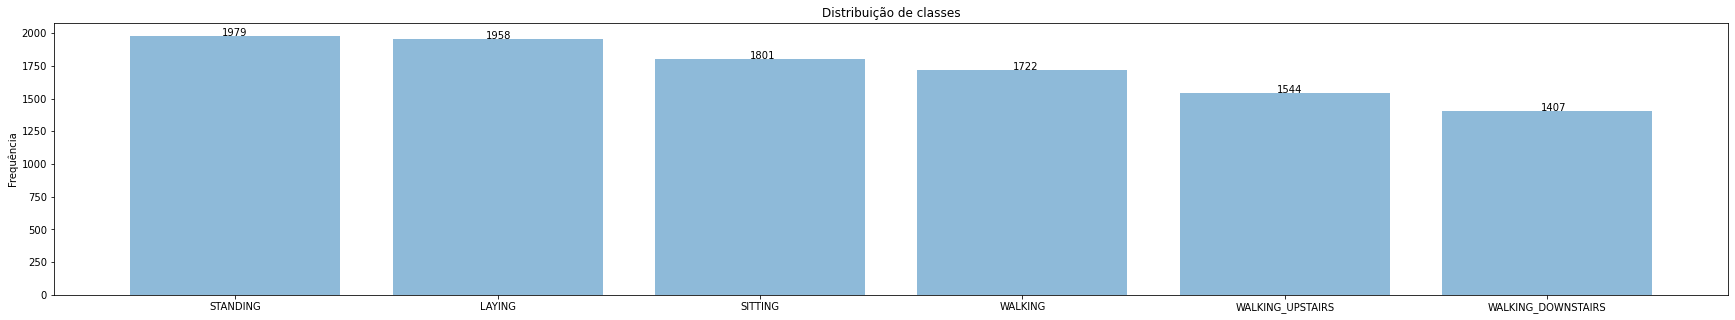

In [3]:
counts = y.value_counts()
bar_y = counts.index.to_list()
bar_x = counts.tolist()
y_pos = np.arange(len(bar_y))

plt.subplots(figsize=(30,5))
plt.bar(y_pos, bar_x, align='center', alpha = 0.5)
plt.xticks(y_pos, bar_y)
xlocs, xlabs = plt.xticks()
plt.ylabel('Frequência')
plt.title('Distribuição de classes')
for i, v in enumerate(bar_x):
    plt.text(xlocs[i] - 0.05 + i*0.005, v + 0.7, str(v))

## Scatter plot

In [4]:
# Pre-Process data

tsne_data = X.copy()
label = y.copy()

# Scale data so it has mean = 0, std = 1
scl = StandardScaler()
# and scale every entry to [0,1] range
tsne_data = scl.fit_transform(tsne_data)
# so that the sparse data is centered

# Reduce dimensions (speed up)
# uses SVD (Singular Value Decomposition)
# to linear dimensionality reduction (projection)
# requires not sparsed data
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
# t-distributed stochastic neighbor embedding
# nonlinear dimensionality reduction to high dim data
# for visulation on low dim spaces
tsne = TSNE(random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(tsne_data)


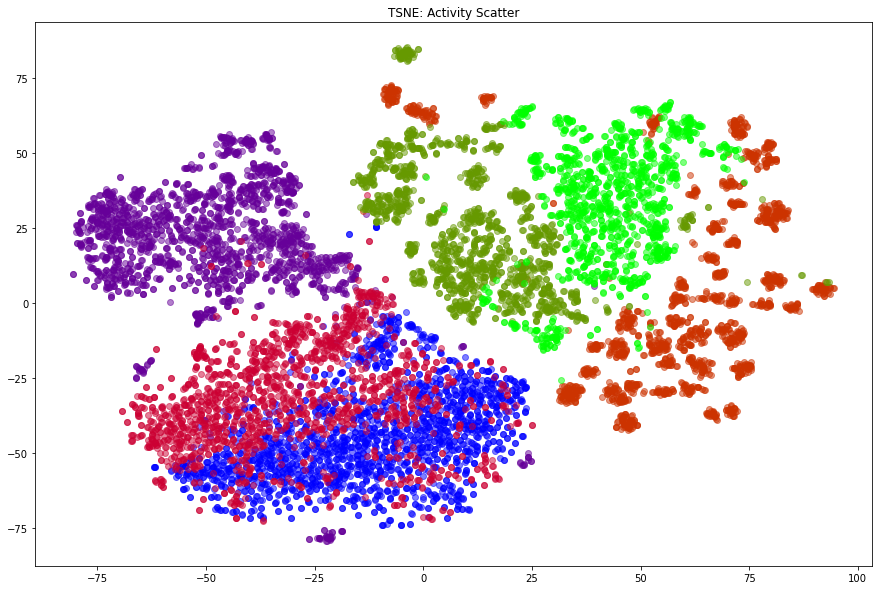

In [5]:
## Plot Activities

# Create subplots
plt.subplots(figsize=(15,10))

# Get colors
n = label.unique().shape[0]
colormap = get_cmap('brg')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label.value_counts().index):
    # Mask to separate sets
    mask = (label==group).values
    # ax[0]
    plt.scatter(
        x=tsne_transformed[mask][:,0],
        y=tsne_transformed[mask][:,1],
        c=colors[i],
        alpha=0.5,
        label=group
    )
plt.title('TSNE: Activity Scatter')
plt.show()

## KNN

In [6]:
knn_results = []

# KNN classifiers with odd K in range of (1,19)
# search for best K
for i in range(10):
    k = i*2+1
    knnClass = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    result = cross_validate(knnClass, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    knn_results.append(result)
    print("k = " + str(k) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# spoiler it's: 9

k = 1:
	f1:
		mean = 89.31%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 93.60%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 93.60%;
		std = 0.01;
	balanced accuracy:
		mean = 89.31%;
		std = 0.02;
	accuracy:
		mean = 89.35%;
		std = 0.02;
k = 3:
	f1:
		mean = 90.83%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 97.63%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 97.63%;
		std = 0.01;
	balanced accuracy:
		mean = 90.78%;
		std = 0.02;
	accuracy:
		mean = 90.87%;
		std = 0.02;
k = 5:
	f1:
		mean = 91.14%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 98.43%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 98.43%;
		std = 0.01;
	balanced accuracy:
		mean = 91.08%;
		std = 0.02;
	accuracy:
		mean = 91.16%;
		std = 0.02;
k = 7:
	f1:
		mean = 91.20%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 98.78%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 98.79%;
		std = 0.01;
	balanced accuracy:
		mean = 91.17%;
		std = 0.02;
	accuracy:
		mean = 91.23%;
		std = 0.02;
k = 9:
	f1:
		mean = 91.45%;
		std = 0.02;
	ROC AUC 

## KNN report

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       588
           SITTING       0.91      0.90      0.91       540
          STANDING       0.93      0.92      0.92       594
           WALKING       0.99      1.00      0.99       517
WALKING_DOWNSTAIRS       1.00      0.97      0.99       422
  WALKING_UPSTAIRS       0.97      1.00      0.98       463

          accuracy                           0.96      3124
         macro avg       0.96      0.96      0.96      3124
      weighted avg       0.96      0.96      0.96      3124



## Decision Tree

In [7]:
tree_results = []

# Search for the best tree depth
for i in range(1, 17):
    curr = DecisionTreeClassifier(random_state=42, max_depth=i)
    result = cross_validate(curr, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    tree_results.append(result)
    print("Depth = " + str(i) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# spoiler it's 11

Depth = 1:
	f1:
		mean = 25.95%;
		std = 0.00;
	ROC AUC OneVsRest:
		mean = 68.50%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 67.47%;
		std = 0.00;
	balanced accuracy:
		mean = 33.32%;
		std = 0.00;
	accuracy:
		mean = 37.80%;
		std = 0.00;
Depth = 2:
	f1:
		mean = 40.71%;
		std = 0.00;
	ROC AUC OneVsRest:
		mean = 87.94%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 87.22%;
		std = 0.00;
	balanced accuracy:
		mean = 49.94%;
		std = 0.00;
	accuracy:
		mean = 54.30%;
		std = 0.00;
Depth = 3:
	f1:
		mean = 71.80%;
		std = 0.04;
	ROC AUC OneVsRest:
		mean = 94.44%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 94.07%;
		std = 0.01;
	balanced accuracy:
		mean = 74.64%;
		std = 0.04;
	accuracy:
		mean = 76.67%;
		std = 0.04;
Depth = 4:
	f1:
		mean = 85.46%;
		std = 0.03;
	ROC AUC OneVsRest:
		mean = 96.47%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 96.28%;
		std = 0.01;
	balanced accuracy:
		mean = 84.96%;
		std = 0.03;
	accuracy:
		mean = 85.67%;
		std = 0.03;
Depth = 5:
	f1:
		mean = 85.51%;
		s

## Decision Tree Report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
dtree = DecisionTreeClassifier(random_state=42, max_depth=11)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       588
           SITTING       0.90      0.90      0.90       540
          STANDING       0.91      0.91      0.91       594
           WALKING       0.93      0.93      0.93       517
WALKING_DOWNSTAIRS       0.92      0.92      0.92       422
  WALKING_UPSTAIRS       0.89      0.90      0.90       463

          accuracy                           0.93      3124
         macro avg       0.93      0.93      0.93      3124
      weighted avg       0.93      0.93      0.93      3124



## MLP

In [3]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 400

Hidden Layers = 50:
	f1:
		mean = 96.08%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.83%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.84%;
		std = 0.00;
	balanced accuracy:
		mean = 96.13%;
		std = 0.02;
	accuracy:
		mean = 96.10%;
		std = 0.02;
Hidden Layers = 100:
	f1:
		mean = 96.32%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.83%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.83%;
		std = 0.00;
	balanced accuracy:
		mean = 96.38%;
		std = 0.02;
	accuracy:
		mean = 96.34%;
		std = 0.02;
Hidden Layers = 150:
	f1:
		mean = 96.34%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.84%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.84%;
		std = 0.00;
	balanced accuracy:
		mean = 96.42%;
		std = 0.02;
	accuracy:
		mean = 96.36%;
		std = 0.02;
Hidden Layers = 200:
	f1:
		mean = 96.32%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.84%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.85%;
		std = 0.00;
	balanced accuracy:
		mean = 96.38%;
		std = 0.02;
	accuracy:
		mean = 96.34%;
		std = 0.0

## MLP Report

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(400,),
                    random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       588
           SITTING       0.93      0.98      0.95       540
          STANDING       0.98      0.93      0.96       594
           WALKING       0.99      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      0.99      1.00       422
  WALKING_UPSTAIRS       0.99      1.00      1.00       463

          accuracy                           0.98      3124
         macro avg       0.98      0.98      0.98      3124
      weighted avg       0.98      0.98      0.98      3124

